## Intial loading

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [6]:
df.loc[df.time=='Lunch'].describe()

,total_bill,tip,size
count,68.000000,68.000000,68.000000
mean,17.168676,2.728088,2.411765
std,7.713882,1.205345,1.040024
min,7.510000,1.250000,1.000000
25%,12.235000,2.000000,2.000000
50%,15.965000,2.250000,2.000000
75%,19.532500,3.287500,2.000000
max,43.110000,6.700000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


## Matplotlib

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

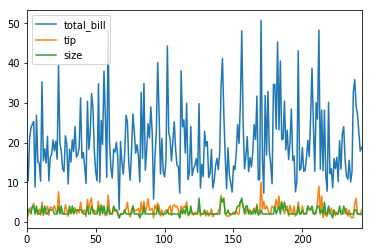

In [12]:
df.plot()

In [0]:
df.sort_values('total_bill', inplace=True)

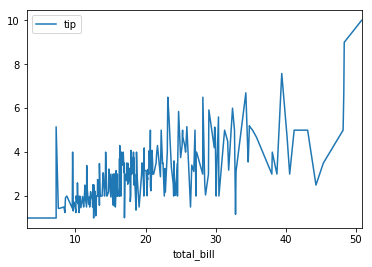

In [15]:
df.plot(x='total_bill',y='tip')

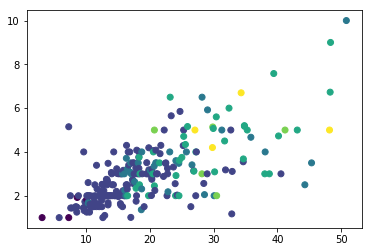

In [20]:
#df.plot.scatter(x='total_bill', y='tip', c='size')
#df.plot.scatter(x='total_bill', y='tip', c='size', colormap='viridis')
plt.scatter(x=df['total_bill'],y=df['tip'], c=df['size'])

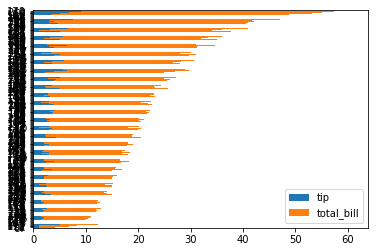

In [27]:
#df.loc[:,['tip','size']].plot(kind='bar')
df.loc[:,['tip','total_bill']].plot.barh(stacked=True)

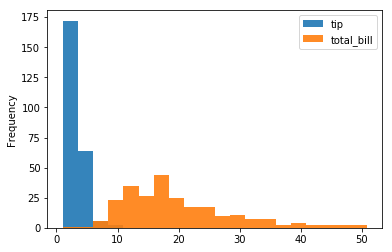

In [34]:
df[['tip','total_bill']].plot.hist(alpha = 0.9, bins=20, orientation='vertical')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb05b3b12b0>,
      dtype=object)

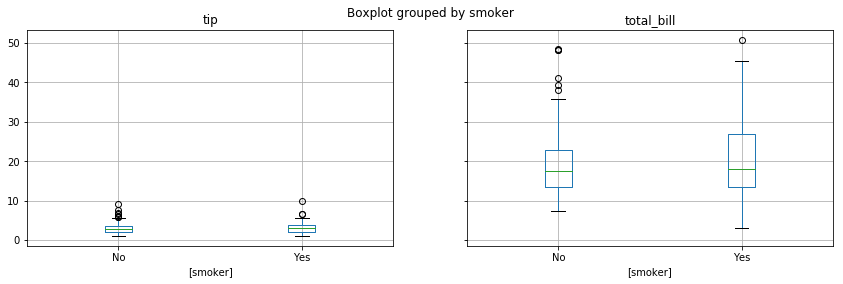

In [43]:
df.boxplot(column=['tip','total_bill'], by=['smoker'], figsize=(14,4))
#df[['total_bill', 'tip']].boxplot()

In [44]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

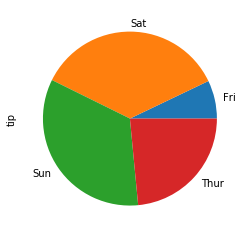

In [71]:
#plt.pie(x=df.tip, y=df.day)
#df.groupby(['day']).sum()[['tip']].plot.pie(subplots=True, figsize=(12,6), autopct='%0.2f')
#df.groupby('day').sum()['total_bill'].plot.pie(autopct='%0.1f')
df.groupby('day').sum()['tip'].plot.pie()

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.8, diagonal='kde',figsize=(12,6))

In [0]:
df.plot.kde(subplots=True, sharex=False, figsize=(14,6))

## Seaborn

In [0]:
import seaborn as sns

In [0]:
sns.set(style='whitegrid')
#plt.xticks(rotation=70)
#plt.rcParams['xtick.labelsize']=9

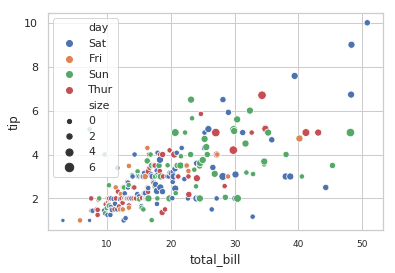

In [87]:
sns.scatterplot(x='total_bill',y='tip',data=df, hue='day', size='size')

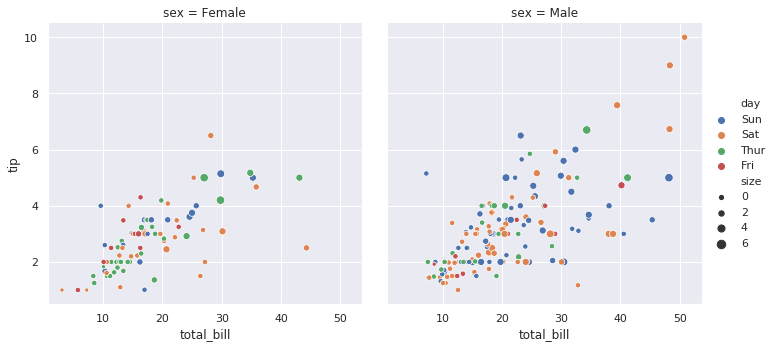

In [0]:
sns.relplot(x='total_bill',y='tip',hue='day',size='size',col='sex', data=df)

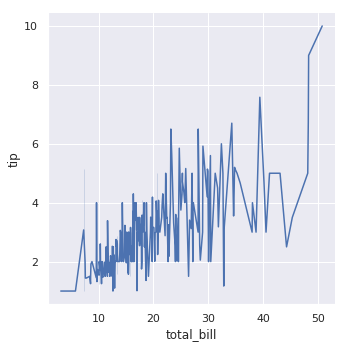

In [0]:
sns.relplot(kind='line',x='total_bill', y='tip', data=df)

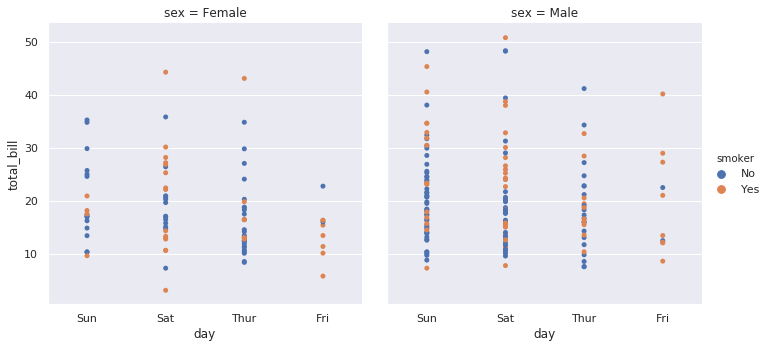

In [0]:
#sns.stripplot(x='day',y='total_bill', data=df)
sns.catplot(x='day', y='total_bill', hue='smoker', col='sex', data=df, jitter=False)

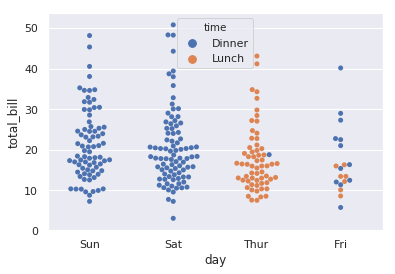

In [0]:
sns.swarmplot(x='day',y='total_bill', hue='time', data=df)

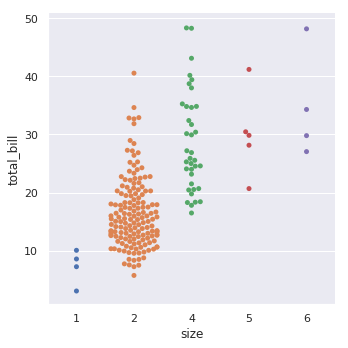

In [0]:
sns.catplot(x='size',y='total_bill', kind='swarm',data=df.query('size !=3'))

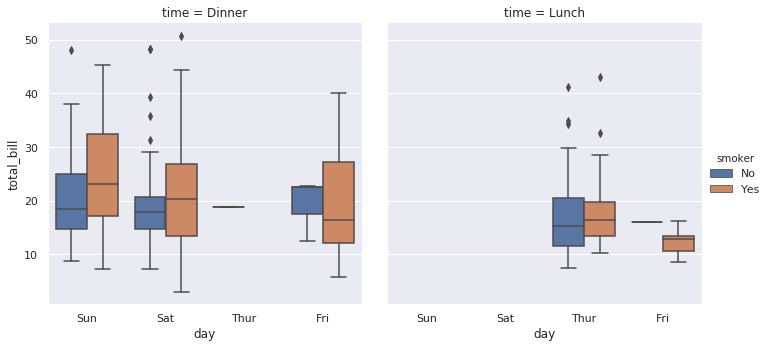

In [0]:
sns.catplot(kind='box', y='total_bill', x='day', col='time', hue='smoker', data=df)

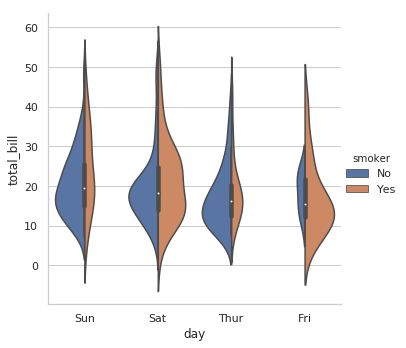

In [22]:
sns.catplot(kind='violin', y='total_bill', x='day', hue='smoker', scale='count', split=True, data=df)

In [12]:
diamonds = sns.load_dataset('diamonds')
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


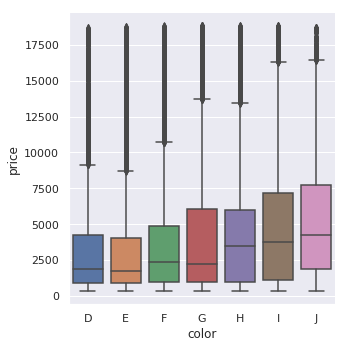

In [0]:
sns.catplot(kind='box',x='color',y='price',data=diamonds.sort_values('color'))

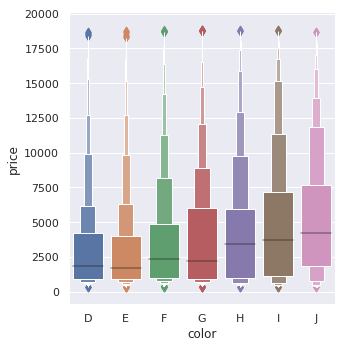

In [0]:
sns.catplot(kind='boxen',x='color',y='price',data=diamonds.sort_values('color'))

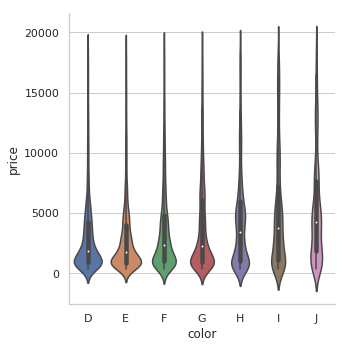

In [13]:
sns.catplot(kind='violin',x='color',y='price',data=diamonds.sort_values('color'))

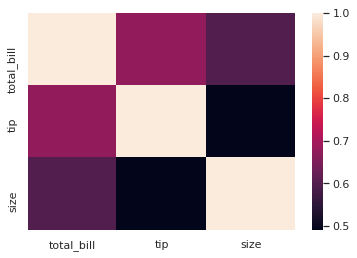

In [24]:
sns.heatmap(df.corr())

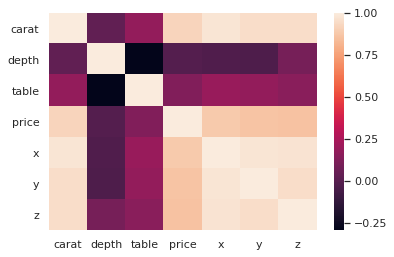

In [25]:
sns.heatmap(diamonds.corr())

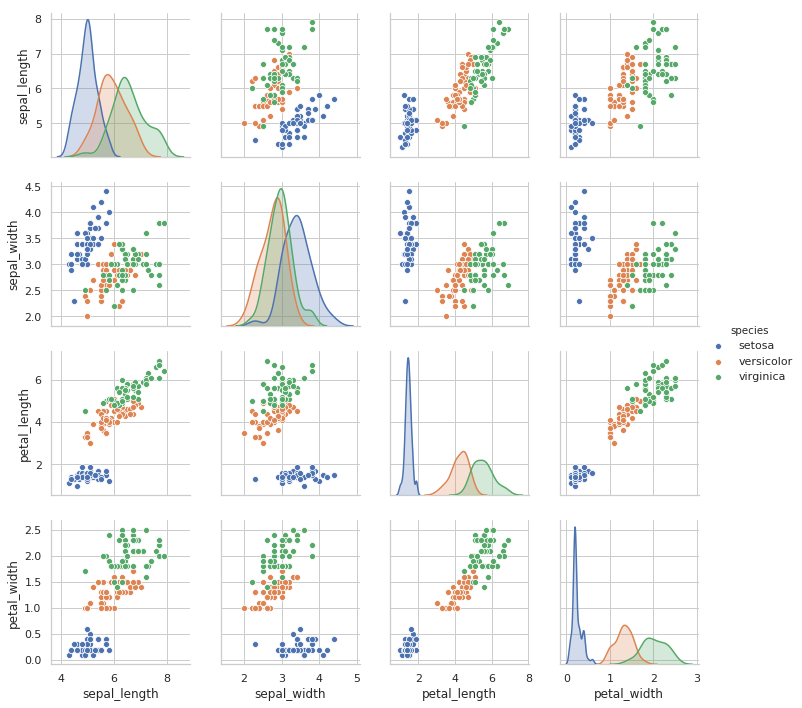

In [28]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')

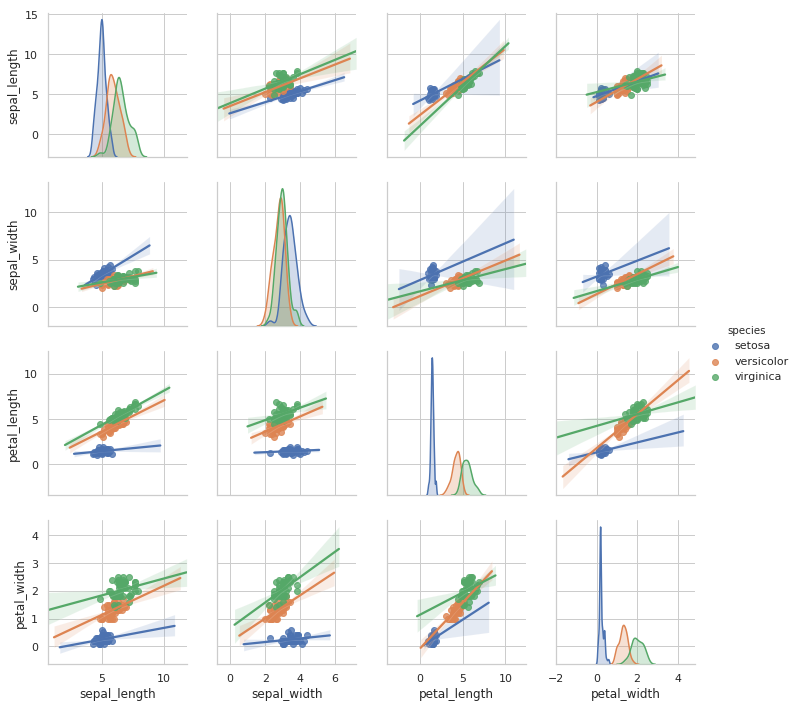

In [30]:
sns.pairplot(iris, kind='reg', hue='species')